# Explore here

In [21]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split


train_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# Divido el dataset en traun y test 
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

# Lo concateno para analizarlo en conjunto
total_data = pd.concat([train_data, test_data]).reset_index(inplace= False) 
total_data.drop(columns = ["index"], inplace = True) # Reseteo el indice y elimino la columna para que no hayan duplicados o desorden en el indice

total_data.head() # Imprimo las primeras 5 filas 

print(train_data.shape)


(34226, 16)


In [12]:
total_data.shape

(48895, 16)

In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 97790 filas y un total de 16 columnas. 
Podemos observar que las que tienen una mayor cantidad de nulos son las columnas de las_review y reviews_per_month con 10052 entradas nulas (20.6 % del total). Habrá que analizar como se gestionará esto, ya que según el head podría ser siempre que el number_of_reviews sea 0. 
name, host_id o host_name y neighbourhood pueden no ser relevantes para el analisis y tener demasiadas categorías únicas. 

Los datos cuentan con 10 variables númericas y 6 categoricas. 



In [18]:
# Visualizar si existen duplicados

print(total_data.duplicated().sum())

 

0


### No existen duplicados en el dataset

In [22]:
# Eliminar información irrelevante 

total_data.drop(["id","name", "host_id", "host_name", "neighbourhood"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,40.69206,-73.74546,Entire home/apt,169,2,65,2019-06-26,2.33,1,263
1,Brooklyn,40.66060,-73.99455,Entire home/apt,94,2,24,2019-06-23,1.15,1,12
2,Manhattan,40.74227,-73.97432,Private room,100,5,2,2017-07-16,0.07,1,0
3,Brooklyn,40.68676,-73.94593,Private room,51,1,4,2019-06-23,2.86,3,0
4,Manhattan,40.76013,-73.96566,Shared room,99,3,6,2017-10-08,0.24,1,0


### Eliminación de información 

Se decide eliminar las columnas "id","name", "host_id", "host_name" ya que no aportan información relevante para el data set. Son variables categóricas con demasiadas opciones que no aportan valor significativo al análisis. 
En el caso de "neighbourhood" se decide eliminar por un motivo similar al anterior pero teniendo en cuenta que tenemos la columna "neighbourhood_group" que simplifica el contenido en menos cantidad de categorías. 

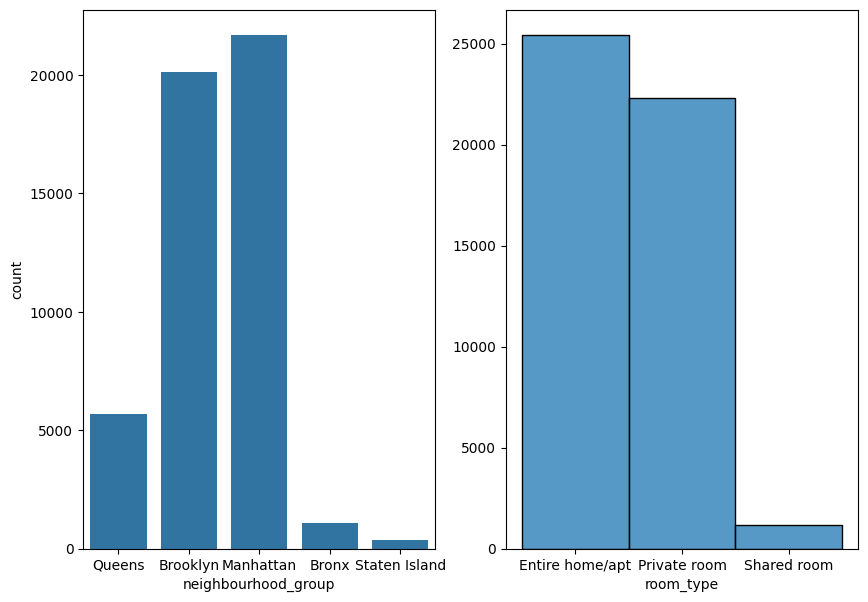

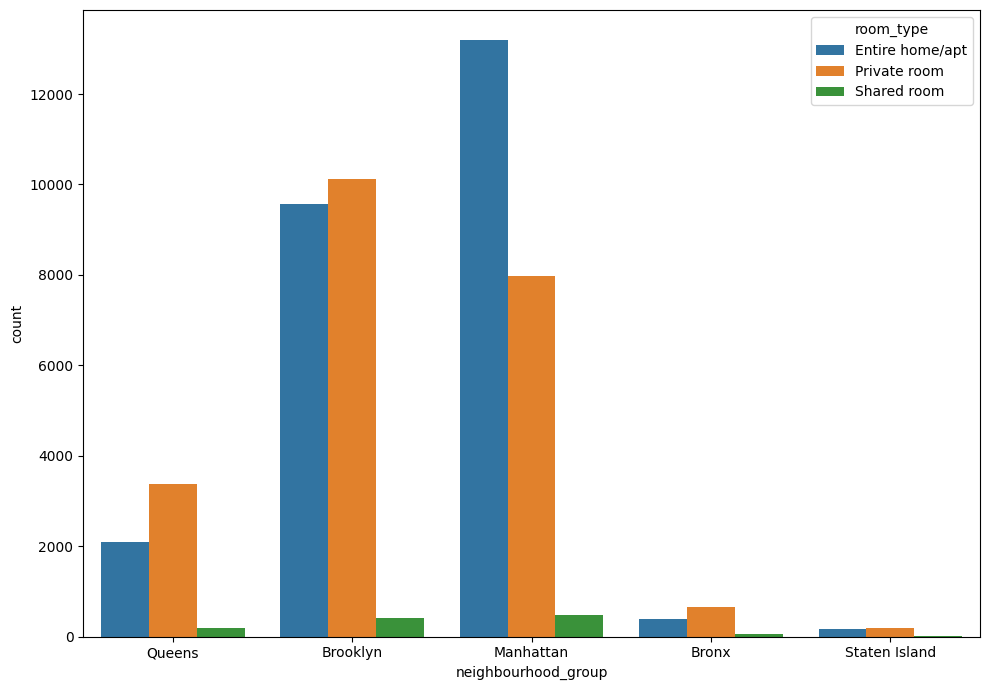

In [37]:
# Análisis de variables univariante

# Variables categóricas 

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 7))

# Crear un histograma múltiple
#sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set_xlim(-0.1, 1.1) # No me muestra todas las categorias 
sns.countplot(data=total_data, x="neighbourhood_group", ax=axis[0])
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)

plt.figure(figsize=(10, 7))
sns.countplot(data=total_data, x="neighbourhood_group", hue="room_type")



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# # si hay valores nulos en 'neighbourhood_group'
# print(total_data["neighbourhood_group"].isnull().sum())

# # valores únicos en 'neighbourhood_group'
# print(total_data["neighbourhood_group"].unique())

La mayot parte de las propiedades de Airbnb están concentradas en Manhattan y Brooklyn, lo que indicaría que estas zonas son las más populares (probablemente para el turismo) y/o rentables para los anfitriones. 

La mayoría de las propiedades listadas son apartamentos enteros, seguido por habitación privada. Esto podría variar como elección para los turistas en base al costo de cada opción, probablemete.



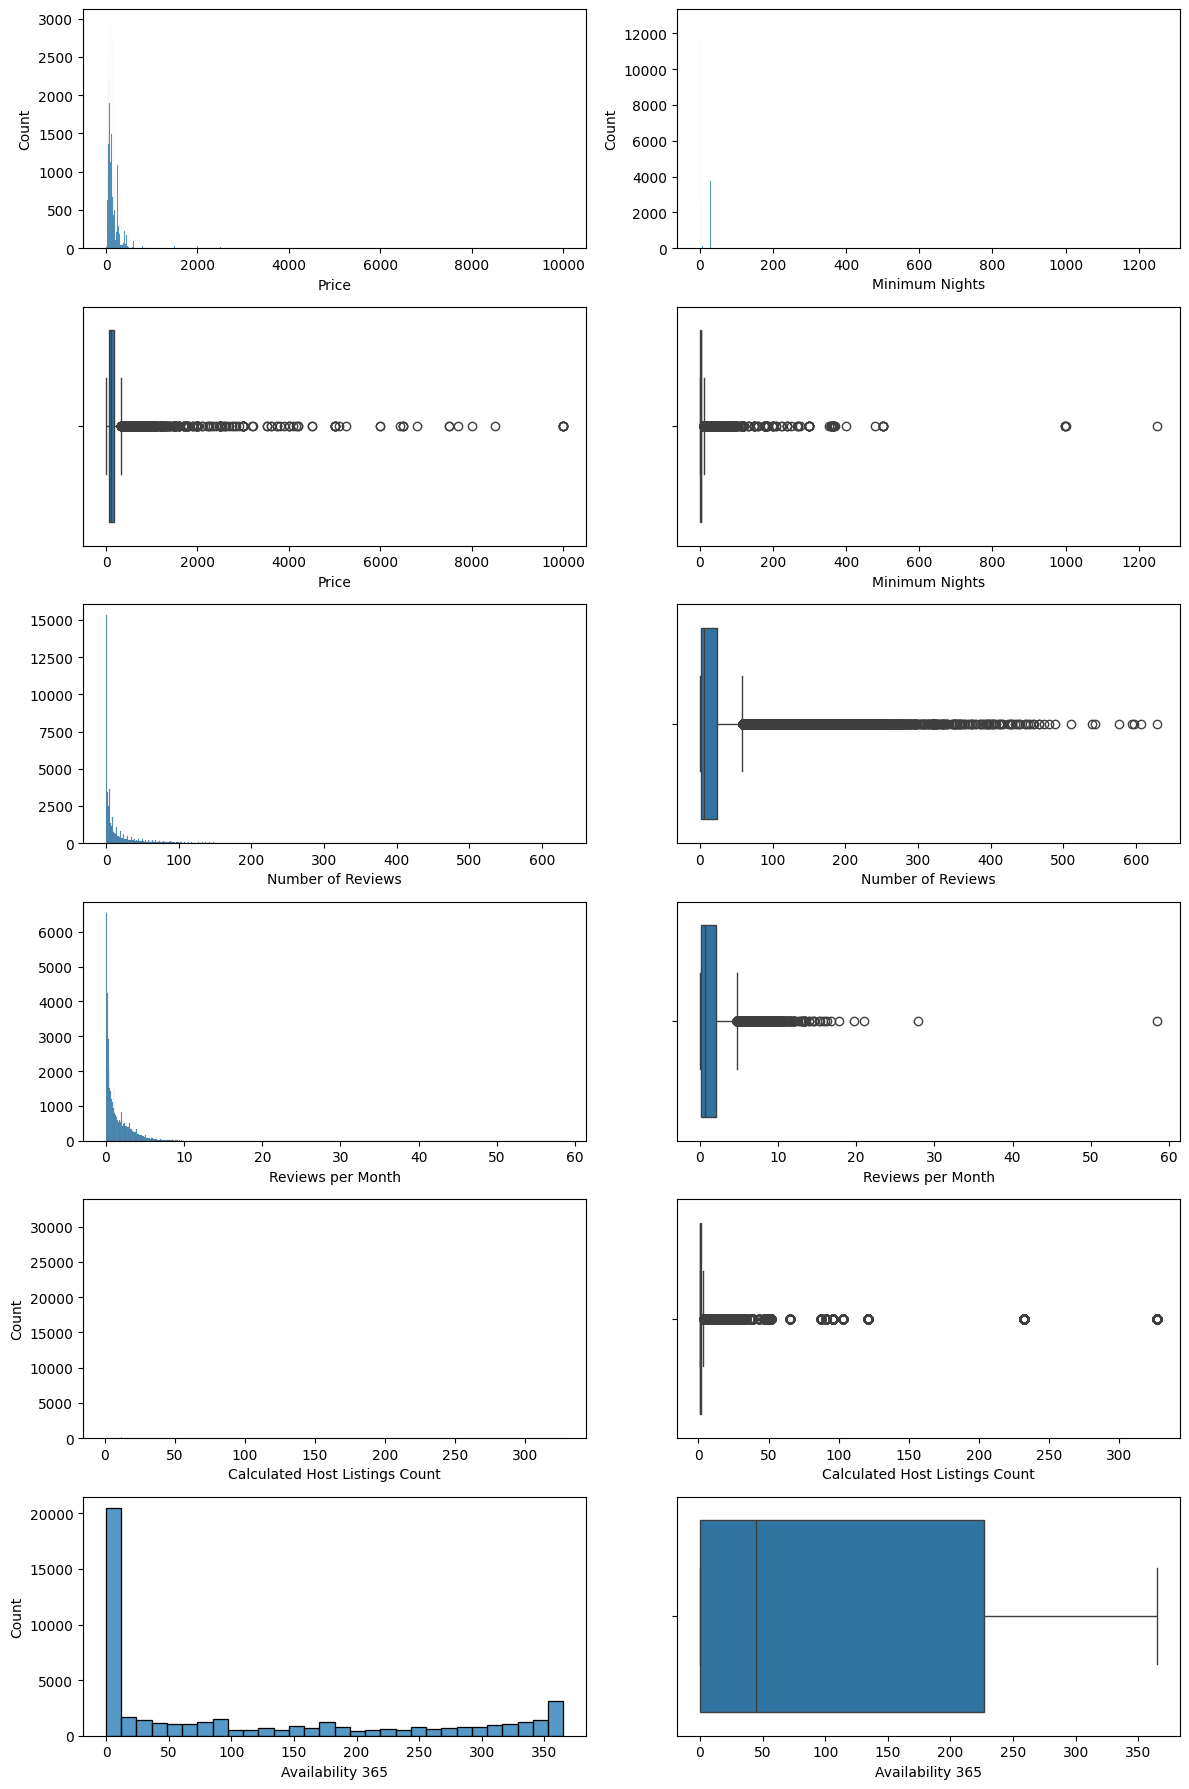

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura con la distribución de subgráficos (3 filas x 2 columnas)
fig, axis = plt.subplots(6, 2, figsize=(12, 18))

# Crear los histogramas y diagramas de caja para cada variable
sns.histplot(ax=axis[0, 0], data=total_data, x="price").set(xlabel="Price")
sns.boxplot(ax=axis[1, 0], data=total_data, x="price").set(xlabel="Price")

sns.histplot(ax=axis[0, 1], data=total_data, x="minimum_nights").set(xlabel="Minimum Nights")
sns.boxplot(ax=axis[1, 1], data=total_data, x="minimum_nights").set(xlabel="Minimum Nights")

sns.histplot(ax=axis[2, 0], data=total_data, x="number_of_reviews").set(xlabel="Number of Reviews", ylabel=None)
sns.boxplot(ax=axis[2, 1], data=total_data, x="number_of_reviews").set(xlabel="Number of Reviews")

sns.histplot(ax=axis[3, 0], data=total_data, x="reviews_per_month").set(xlabel="Reviews per Month", ylabel=None)
sns.boxplot(ax=axis[3, 1], data=total_data, x="reviews_per_month").set(xlabel="Reviews per Month")

sns.histplot(ax=axis[4, 0], data=total_data, x="calculated_host_listings_count").set(xlabel="Calculated Host Listings Count")
sns.boxplot(ax=axis[4, 1], data=total_data, x="calculated_host_listings_count").set(xlabel="Calculated Host Listings Count")

sns.histplot(ax=axis[5, 0], data=total_data, x="availability_365").set(xlabel="Availability 365")
sns.boxplot(ax=axis[5, 1], data=total_data, x="availability_365").set(xlabel="Availability 365")

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()